### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

### Functions

In [2]:
def plot_disease_data(df, years):
    regions = df['Region'].unique()
    n_regions = len(regions)

    nrows = math.floor(math.sqrt(n_regions))
    ncols = math.ceil(n_regions / nrows)
    
    # Check if we need to adjust to make it fit more neatly
    while nrows * ncols < n_regions:
        nrows += 1

    width = 5
    fig, ax = plt.subplots(nrows, ncols, figsize=(width*ncols, width*nrows))
    ax = np.atleast_2d(ax)

    for i, region in enumerate(regions):
        row = i // ncols
        col = i % ncols

        cases_per_100000 = df[(df['Year'] <= years[-1]) & (df['Region'] == region)]['Total cases per 100000']
        cases_per_year = df[(df['Year'] <= years[-1]) & (df['Region'] == region)]['Total cases']

        ax[row, col].plot(years, cases_per_100000, label="Cases per 100'000 people")
        ax[row, col].set_ylim(0, 1.8)
        ax[row, col].set_title(f'{region}')
        ax[row, col].set_ylabel("Cases per 100'000 people")
        
        ax[row, col].plot(years, cases_per_100000, 'ro', label='Total cases')
        for i in range(len(years)):
            ax[row, col].text(years[i], cases_per_100000.iloc[i], cases_per_year.iloc[i], fontsize=10, ha='left', va='bottom', color='red')

        # pop_per_year = df[(df['Year'] <= years[-1]) & (df['Region'] == region)]['Pop']
        MenCases_per_100000 = [df[(df['Year'] <= years[-1]) & (df['Region'] == region)][f'{serogroup} per 100000'] for serogroup in ['MenB', 'MenC']]

        ax[row, col].bar(years, MenCases_per_100000[0], color='skyblue', alpha=0.5, label='MenB')
        ax[row, col].bar(years, MenCases_per_100000[1], bottom=MenCases_per_100000[0], color='orange', alpha=0.5, label='MenC')
        ax[row, col].legend()

    plt.show()


### Disease data

In [4]:
# Import dataframes 

df_cases = pd.read_csv('Data/Disease_data_2014-2023.csv')
df_corrected = pd.read_csv('Data/Disease_data_2014-2023_corrected.csv')

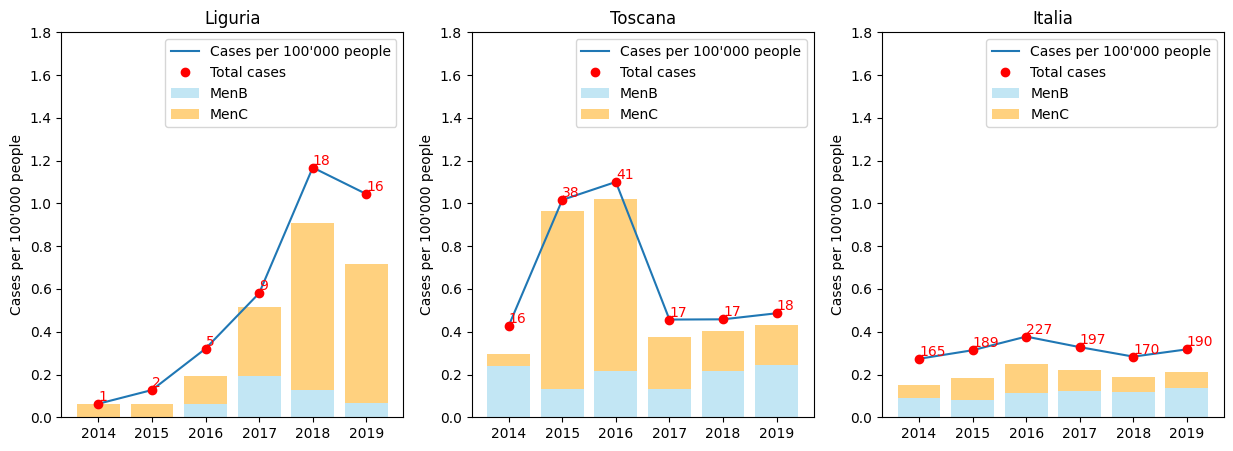

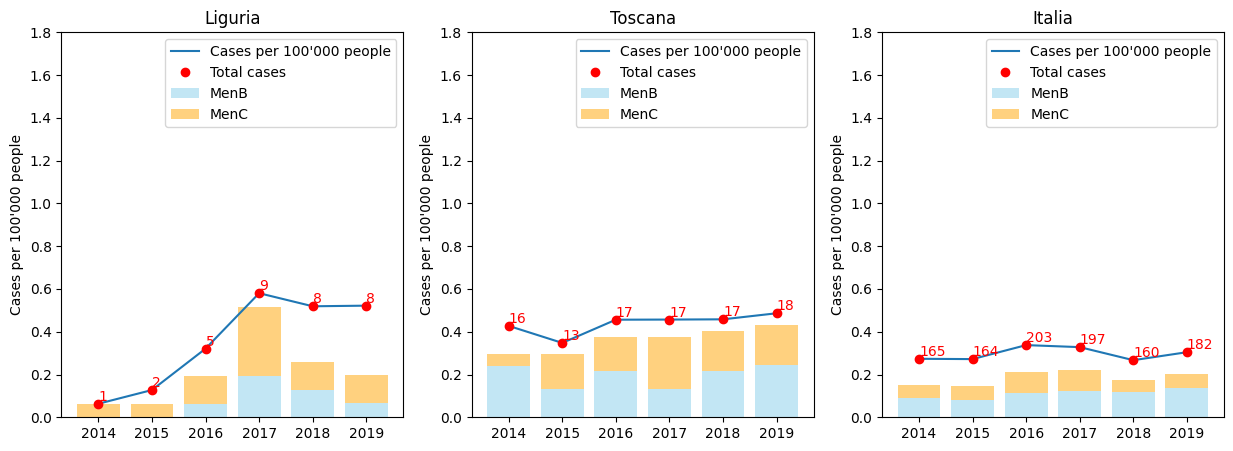

In [6]:
# Plot disease incidence

# years = df_cases['Year'].unique()
years = np.array([2014, 2015, 2016, 2017, 2018, 2019]) # pre-pandemic
# regions = df_cases['Region'].unique()
regions = ['Liguria', 'Toscana', 'Italia']

plot_disease_data(df_cases[df_cases['Region'].isin(regions)], years)
plot_disease_data(df_corrected[df_corrected['Region'].isin(regions)], years)